In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, pi
import import_ipynb

## Importation of Spectral tools
from Spectral_tools import D1_CL, D2_CL #, Pseudospectrum



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

importing Jupyter notebook from Spectral_tools.ipynb


In [2]:
def Pseudospectrum(L,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights) :
    """
    Implement Pseudo-Spectrum of a matrix L
    """
    #import numpy as np
    #from math import pi
    from scipy import linalg as LA
    
    ### 1. Preparation of tools 
    sizeL = np.shape(L)
    if  np.shape(L)[0]!= np.shape(L)[0]:
        print("Non-square Matrix!!! ")
    else : 
        n = np.shape(L)[0]
   
    ### 2. Calculation of the Spectrum (eigenvalues)
    eigenvalues_L, eigenvectors_L = LA.eig(L)

    eigenvalues_L_Re = eigenvalues_L.real
    eigenvalues_L_Im = eigenvalues_L.imag

    
    ### 3. Evaluation of the Pseudospectrum
    
    ### 3.1 Grid for Pseudospectrum calculation
    [X,Y] = np.mgrid[xmin:xmax:Nxgrid*1j,ymin:ymax:Nygrid*1j]

    Z = X + 1j*Y
    print("X = ",X, "\n")
    print("Y = ",Y, "\n")
    #print(Y)
    #print(Z)
    #print(Z[0,1])
    #print("\n")

    ### 3.2 Construction of the "height function" given by the min of the SVP
    Id =  np.eye(n)
    Sigma_min = np.zeros((Nxgrid,Nygrid))
    

    #print(L)
    #print(Sigma_min)
    #print(Id)

    for i in np.arange(0, Nxgrid):
        for j in np.arange(0, Nygrid):
            L_shift = L - Z[i,j]* Id
            Sigma_min[i,j] = min(np.linalg.svd(L_shift, full_matrices=True)[1]) 

    print("Sigma_min = ", Sigma_min)

    #plt.ion()
    #curves=plt.contour(X,Y,Sigma_min,12)
    #plt.clabel(curves)
    
    ### 3.3 Graphical output
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(eigenvalues_L_Re, eigenvalues_L_Im, '+', markersize=1)
    #curves=plt.contour(X,Y,Sigma_min,12)
    #ax.clabel(curves)    
    CS = ax.contour(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)
    #CS = ax.contour(X,Y,Sigma_min,12)
    #ax.clabel(CS)
    #ax.clabel(plt.contour(X,Y,Sigma_min,heights))
    #ax.clabel(plt.contour(X,Y,Sigma_min,12))
    CB = fig.colorbar(CS)
    ax.set_xlabel(r'$\mathrm{Re}(\omega_n)$')
    ax.set_ylabel(r'$\mathrm{Im}(\omega_n)$')    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%10e' % x))
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(g))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    fig.suptitle(r'Spectrum and Pseudospectrum of $L$')
    ax.axis('scaled')
    ax.axis([xmin,xmax,ymin,ymax])
    ax.grid()   
    #ax.set_xlim(xmin,xmax)
    #ax.set_ylim(ymin,ymax)

    fig.show()
    #fig.savefig("/home/jaramillo/Dropbox/Trabajo/Programacion/Python/Diagonalization/Eigenvalues_L.pdf")
    fig.savefig("Pseudospectrum.pdf")


In [3]:

# Number of points n= N+1
#N = 100
def Matrix_Eigenvalues_Test(N):

    # Spectral Differentiation, identity and Zero matrices
    xt = [D1_CL(N)[0]]
    x = np.transpose(xt)
    D1 = D1_CL(N)[1]
    D2 = D2_CL(N)[1]
    Id = np.eye(N+1)
    Zero = np.zeros((N+1,N+1))

    #print(xt)
    #print(xt.shape())
    #print("")
    #print(x)
    ##print(x.shape())
    #print("")
    #print(D1)
    #print("")
    #print(D2)
    #print("")
    #print(xt*D1) 
    #print(x*D1) 
    #print(Id)
    #print(Zero)

    # Matrix L definition
    L = D1
    LT = L.transpose()
    LTL = np.dot(LT,L)
    L_red = L[1:N+1,1:N+1]
    
    xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -110., 10., -100., 100., 50, 50
    heights = np.arange(0.0001, 0.001, 0.00025)
    heights = [1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,1e0, 1e1]
    print("heights =", heights)
    Pseudospectrum(L_red,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights)
    
    #print("L = \n", L)
    #print("L_red = \n", L_red)
    #print("LT = \n", LT)
    #print("LTT = \n", LTL)
    
    # Eigenvalues
    eigenvalues_L, eigenvectors_L = LA.eig(L_red)
    #eigenvalues_L, eigenvectors_L = LA.eig(LTL_test)
    #eigenvalues_L *= -1j
    
    #print(eigenvalues_L)

    
    eigenvalues_L_Re = eigenvalues_L.real
    eigenvalues_L_Im = eigenvalues_L.imag

    #print("Re(s_n) = ", eigenvalues_L_Re )
    #print("Im(s_n) = ", eigenvalues_L_Im )

    
    return eigenvalues_L_Re, eigenvalues_L_Im, eigenvectors_L, x, xt

    #print(D1_CL(N))
    #print(D1_CL(N)[0])
    #print(D1_CL(N)[1])

    #x_CL, D1_CL = D1_CL(N)
    #D2_CL = D2_CL(N)[1]
    #print("Chebyshev-Lobatto grid points = ", x_CL)
    #print("D1_CL = ", D1_CL)
    #print("D2_CL = ", D2_CL)

In [4]:
def Eigenvalues_Graphic(Re_lambda, Im_lambda):
    # Graphical ouput

    eigenvalues_L_Re, eigenvalues_L_Im = Re_lambda, Im_lambda
    
    #print(eigenvalues_L_Re)
    #print(eigenvalues_L_Im)
    
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    ax1.plot(eigenvalues_L_Re, eigenvalues_L_Im, "+")
    ax1.set_xlabel(r'$\mathrm{Re}(\omega_n)$')
    ax1.set_ylabel(r'$\mathrm{Im}(\omega_n)$')  
    ax1.set_aspect('equal','datalim')
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%10e' % x))
    ax1.xaxis.set_major_formatter(mticker.FuncFormatter(g))
    ax1.yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    fig1.suptitle(r'Eigenvalues of $L$ with $n=N+1=%5g$ points' %(N+1))
    ax1.grid()   
    #ax1.set_xlim(0.,500.)
    #ax1.set_ylim(-50.,50.)

    fig1.show()
    #fig.savefig("/home/jaramillo/Dropbox/Trabajo/Programacion/Python/Diagonalization/Eigenvalues_L.pdf")
    fig1.savefig("Eigenvalues_PT_Random1e-5_1.pdf")
    

heights = [1e-13, 1e-11, 1e-09, 1e-07, 1e-05, 0.001, 0.1, 1.0, 10.0]
X =  [[-110.         -110.         -110.         ... -110.
  -110.         -110.        ]
 [-107.55102041 -107.55102041 -107.55102041 ... -107.55102041
  -107.55102041 -107.55102041]
 [-105.10204082 -105.10204082 -105.10204082 ... -105.10204082
  -105.10204082 -105.10204082]
 ...
 [   5.10204082    5.10204082    5.10204082 ...    5.10204082
     5.10204082    5.10204082]
 [   7.55102041    7.55102041    7.55102041 ...    7.55102041
     7.55102041    7.55102041]
 [  10.           10.           10.         ...   10.
    10.           10.        ]] 

Y =  [[-100.          -95.91836735  -91.83673469 ...   91.83673469
    95.91836735  100.        ]
 [-100.          -95.91836735  -91.83673469 ...   91.83673469
    95.91836735  100.        ]
 [-100.          -95.91836735  -91.83673469 ...   91.83673469
    95.91836735  100.        ]
 ...
 [-100.          -95.91836735  -91.83673469 ...   91.83673469
    95.91836735  100.    

C:\Users\JOSE-LUIS\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)
C:\Users\JOSE-LUIS\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


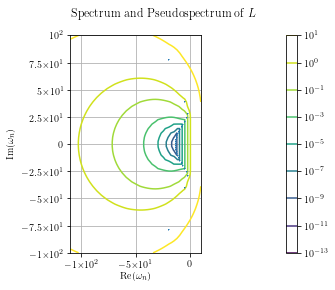

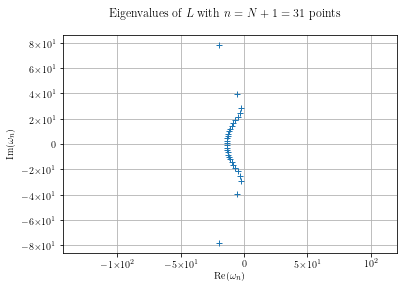

In [5]:
N=30
a, b, c, x, xt = Matrix_Eigenvalues_Test(N)
Eigenvalues_Graphic(a,b)